In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the training data
train_data = pd.read_csv("train_data.csv")

# Display basic information
print("Training Data Summary:")
print(train_data.info())
print("\nFirst few rows of the training data:")
print(train_data.head())

Training Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512041 entries, 0 to 512040
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TIMESTAMP              512041 non-null  object 
 1   LAST_PRICE_HHI         512041 non-null  float64
 2   TURNOVER_VOLUME_HHI    512041 non-null  float64
 3   LAST_BID_PRICE_0_HHI   512041 non-null  float64
 4   LAST_ASK_PRICE_0_HHI   512041 non-null  float64
 5   LAST_BID_VOLUME_0_HHI  512041 non-null  float64
 6   LAST_ASK_VOLUME_0_HHI  512041 non-null  float64
 7   LAST_PRICE_HSI         512041 non-null  float64
 8   TURNOVER_VOLUME_HSI    512041 non-null  float64
 9   LAST_BID_PRICE_0_HSI   512041 non-null  float64
 10  LAST_ASK_PRICE_0_HSI   512041 non-null  float64
 11  LAST_BID_VOLUME_0_HSI  512041 non-null  float64
 12  LAST_ASK_VOLUME_0_HSI  512041 non-null  float64
 13  MIDPOINT_HHI           512041 non-null  float64
 14  MIDPOINT_HSI 

In [5]:
# Convert TIMESTAMP to datetime
train_data['TIMESTAMP'] = pd.to_datetime(train_data['TIMESTAMP'])
print("TIMESTAMP converted to datetime.")

# Descriptive statistics for numeric columns
print("\nSummary Statistics:")
print(train_data.describe())


TIMESTAMP converted to datetime.

Summary Statistics:
       LAST_PRICE_HHI  TURNOVER_VOLUME_HHI  LAST_BID_PRICE_0_HHI  \
count   512041.000000        512041.000000         512041.000000   
mean      8353.637775           109.326478           8352.916360   
std       1782.271845           178.479892           1782.248375   
min       4931.000000             1.000000           4931.000000   
25%       6872.000000            15.000000           6871.000000   
50%       8121.000000            52.000000           8120.000000   
75%       9496.000000           139.000000           9495.000000   
max      12252.000000         15483.000000          12251.000000   

       LAST_ASK_PRICE_0_HHI  LAST_BID_VOLUME_0_HHI  LAST_ASK_VOLUME_0_HHI  \
count         512041.000000          512041.000000          512041.000000   
mean            8354.356180              10.036075               9.794530   
std             1782.288484              25.174862               8.810228   
min             4932.0000

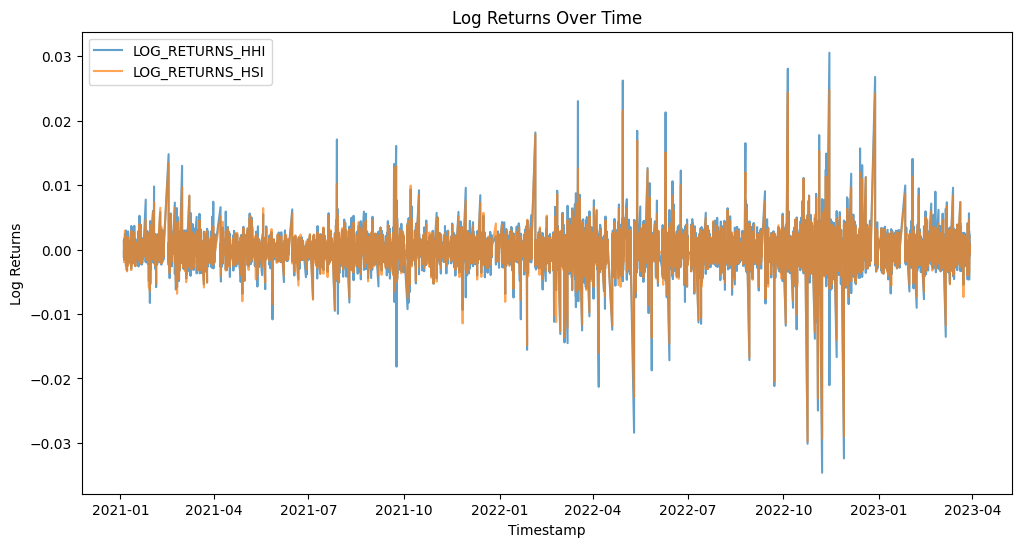

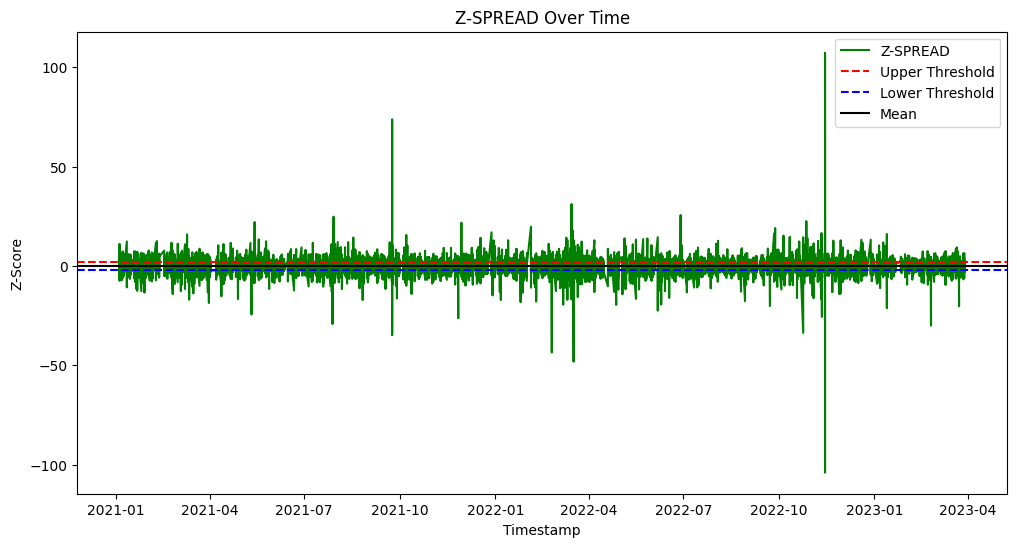

In [6]:
# Plot LOG_RETURNS_HHI and LOG_RETURNS_HSI over time
plt.figure(figsize=(12, 6))
plt.plot(train_data['TIMESTAMP'], train_data['LOG_RETURNS_HHI'], label='LOG_RETURNS_HHI', alpha=0.7)
plt.plot(train_data['TIMESTAMP'], train_data['LOG_RETURNS_HSI'], label='LOG_RETURNS_HSI', alpha=0.7)
plt.title('Log Returns Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# Plot Z-SPREAD over time
plt.figure(figsize=(12, 6))
plt.plot(train_data['TIMESTAMP'], train_data['Z_SPREAD'], label='Z-SPREAD', color='green')
plt.axhline(2, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(-2, color='blue', linestyle='--', label='Lower Threshold')
plt.axhline(0, color='black', linestyle='-', label='Mean')
plt.title('Z-SPREAD Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Z-Score')
plt.legend()
plt.show()


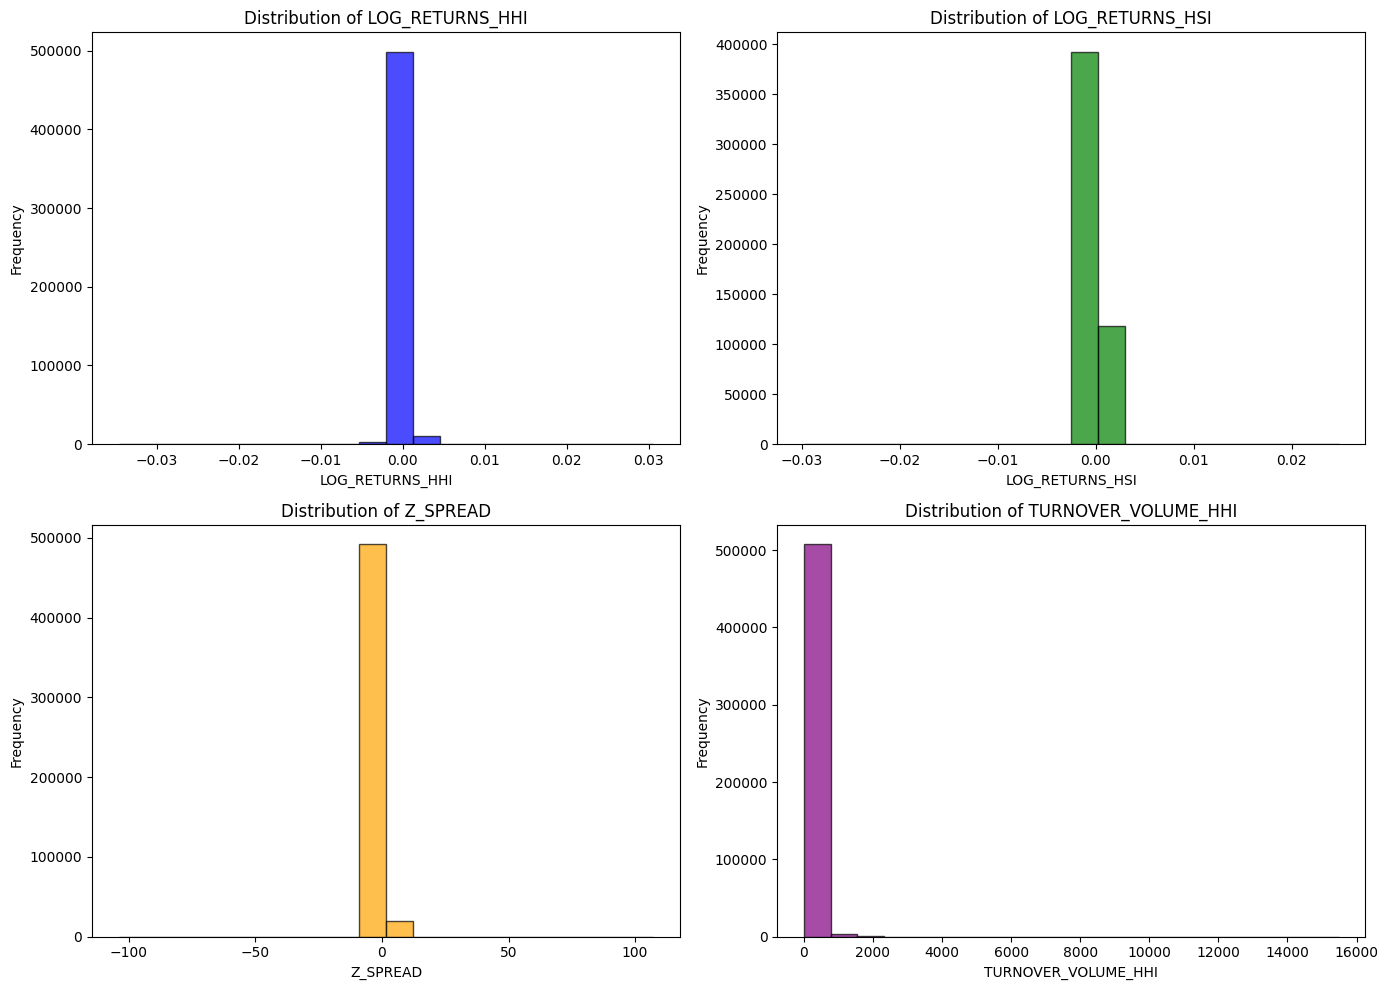

       LOG_RETURNS_HHI  LOG_RETURNS_HSI       Z_SPREAD  TURNOVER_VOLUME_HHI  \
count     5.120410e+05     5.120410e+05  512041.000000        512041.000000   
mean     -8.566264e-07    -5.834402e-07       0.000452           109.326478   
std       6.041044e-04     5.231839e-04       1.048508           178.479892   
min      -3.464655e-02    -2.980856e-02    -104.019569             1.000000   
25%      -2.257082e-04    -2.003326e-04      -0.477259            15.000000   
50%       0.000000e+00     0.000000e+00      -0.000499            52.000000   
75%       2.240520e-04     1.983818e-04       0.479894           139.000000   
max       3.056866e-02     2.478850e-02     107.266582         15483.000000   

       TURNOVER_VOLUME_HSI  
count        512041.000000  
mean            129.967188  
std             198.497000  
min               1.000000  
25%              15.000000  
50%              50.000000  
75%             169.000000  
max            6559.000000  


In [14]:
import matplotlib.pyplot as plt

# Statistical summary of key features
feature_summary = train_data[[
    "LOG_RETURNS_HHI", "LOG_RETURNS_HSI", 
    "Z_SPREAD", "TURNOVER_VOLUME_HHI", "TURNOVER_VOLUME_HSI"
]].describe()

# Visualizing distributions
plt.figure(figsize=(14, 10))

# LOG_RETURNS_HHI
plt.subplot(2, 2, 1)
plt.hist(train_data["LOG_RETURNS_HHI"], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of LOG_RETURNS_HHI")
plt.xlabel("LOG_RETURNS_HHI")
plt.ylabel("Frequency")

# LOG_RETURNS_HSI
plt.subplot(2, 2, 2)
plt.hist(train_data["LOG_RETURNS_HSI"], bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title("Distribution of LOG_RETURNS_HSI")
plt.xlabel("LOG_RETURNS_HSI")
plt.ylabel("Frequency")

# Z_SPREAD
plt.subplot(2, 2, 3)
plt.hist(train_data["Z_SPREAD"], bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title("Distribution of Z_SPREAD")
plt.xlabel("Z_SPREAD")
plt.ylabel("Frequency")

# TURNOVER_VOLUME_HHI
plt.subplot(2, 2, 4)
plt.hist(train_data["TURNOVER_VOLUME_HHI"], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title("Distribution of TURNOVER_VOLUME_HHI")
plt.xlabel("TURNOVER_VOLUME_HHI")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Print the statistical summary for review
print(feature_summary)

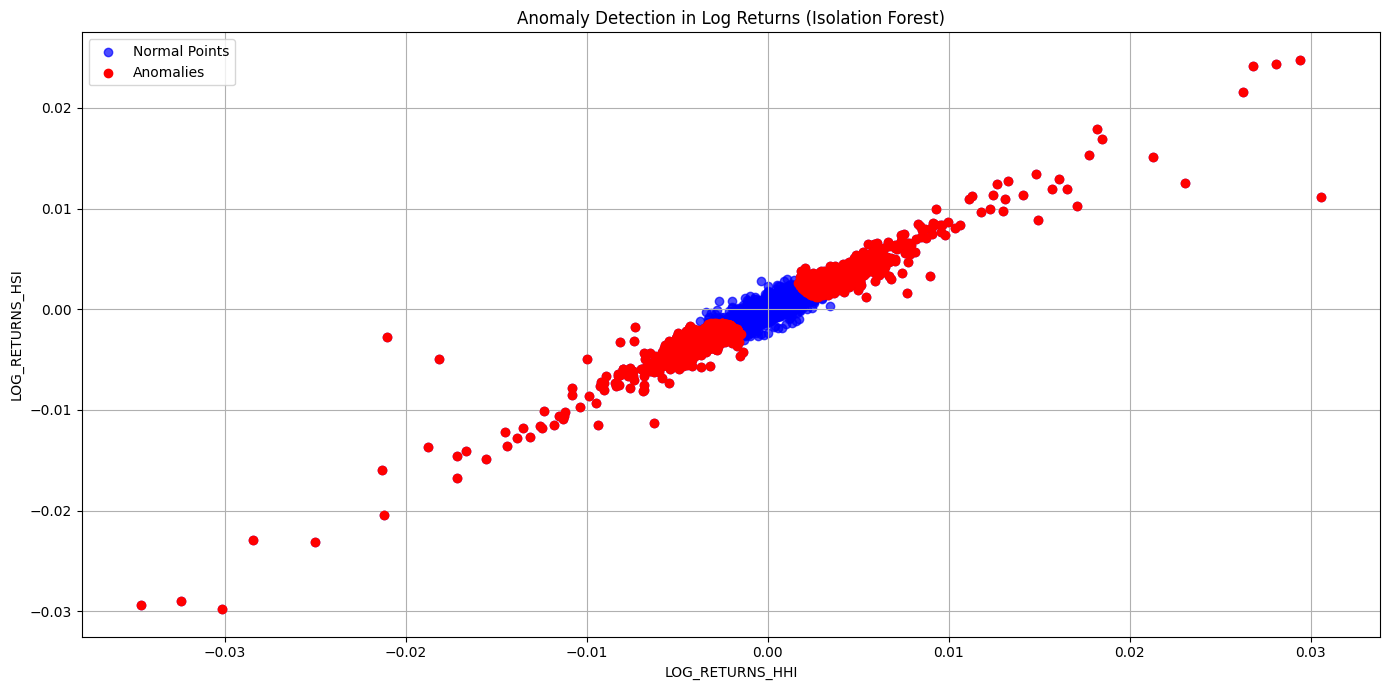

Number of anomalies detected: 5118
                       TIMESTAMP  LOG_RETURNS_HHI  LOG_RETURNS_HSI  \
945    2021-01-05 09:16:00+08:00         0.002447         0.002941   
1904   2021-01-06 09:16:00+08:00        -0.002499        -0.003085   
1919   2021-01-06 09:31:00+08:00         0.002964         0.001575   
2069   2021-01-06 13:01:00+08:00         0.002743         0.001931   
2863   2021-01-07 09:16:00+08:00        -0.003219        -0.003385   
...                          ...              ...              ...   
511491 2023-03-28 17:16:00+08:00         0.005632         0.004690   
511742 2023-03-28 21:31:00+08:00         0.002848         0.002068   
511743 2023-03-28 21:32:00+08:00         0.002331         0.002015   
511744 2023-03-28 21:33:00+08:00        -0.004667        -0.003659   
511748 2023-03-28 21:37:00+08:00        -0.002780        -0.002420   

        LOG_RETURNS_ANOMALY  
945                      -1  
1904                     -1  
1919                     -1  
2069

In [15]:
from sklearn.ensemble import IsolationForest

# Select only LOG_RETURNS features
log_return_features = train_data[["LOG_RETURNS_HHI", "LOG_RETURNS_HSI"]]

# Fit Isolation Forest
iso_forest_log_returns = IsolationForest(contamination=0.01, random_state=42)
train_data["LOG_RETURNS_ANOMALY"] = iso_forest_log_returns.fit_predict(log_return_features)

# Filter anomalies (LOG_RETURNS_ANOMALY = -1 indicates anomaly)
log_returns_anomalies = train_data[train_data["LOG_RETURNS_ANOMALY"] == -1]

# Visualizing anomalies in LOG_RETURNS_HHI and LOG_RETURNS_HSI
plt.figure(figsize=(14, 7))

# Plot LOG_RETURNS_HHI and LOG_RETURNS_HSI
plt.scatter(
    train_data["LOG_RETURNS_HHI"],
    train_data["LOG_RETURNS_HSI"],
    label="Normal Points",
    alpha=0.7,
    color="blue",
)

# Highlight detected anomalies
plt.scatter(
    log_returns_anomalies["LOG_RETURNS_HHI"],
    log_returns_anomalies["LOG_RETURNS_HSI"],
    color="red",
    label="Anomalies",
    zorder=5,
)

# Adding labels and legend
plt.title("Anomaly Detection in Log Returns (Isolation Forest)")
plt.xlabel("LOG_RETURNS_HHI")
plt.ylabel("LOG_RETURNS_HSI")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Print anomalies
print("Number of anomalies detected:", len(log_returns_anomalies))
print(log_returns_anomalies[["TIMESTAMP", "LOG_RETURNS_HHI", "LOG_RETURNS_HSI", "LOG_RETURNS_ANOMALY"]])


In [ ]:
# Select multivariate features for anomaly detection
features = train_data[["Z_SPREAD", "TURNOVER_VOLUME_HHI", "TURNOVER_VOLUME_HSI"]]

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
train_data["ANOMALY_SCORE"] = iso_forest.fit_predict(features)

# Filter anomalies (ANOMALY_SCORE = -1 indicates anomaly)
ml_anomalies = train_data[train_data["ANOMALY_SCORE"] == -1]

# Visualizing anomalies automatically
plt.figure(figsize=(14, 7))

# Plot Z_SPREAD
plt.plot(train_data["TIMESTAMP"], train_data["Z_SPREAD"], label="Z_SPREAD", marker='o', alpha=0.7)

# Highlight detected anomalies
plt.scatter(
    ml_anomalies["TIMESTAMP"],
    ml_anomalies["Z_SPREAD"],
    color="red",
    label="Detected Anomalies",
    zorder=5,
)

# Additional visualizations for TURNOVER_VOLUME_HHI and HSI
plt.plot(train_data["TIMESTAMP"], train_data["TURNOVER_VOLUME_HHI"], label="TURNOVER_VOLUME_HHI", linestyle="--")
plt.plot(train_data["TIMESTAMP"], train_data["TURNOVER_VOLUME_HSI"], label="TURNOVER_VOLUME_HSI", linestyle=":")

# Adding labels and legend
plt.title("Multivariate Anomaly Detection Visualization")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Print anomalies
print("Number of anomalies detected:", len(ml_anomalies))
print(ml_anomalies[["TIMESTAMP", "Z_SPREAD", "TURNOVER_VOLUME_HHI", "TURNOVER_VOLUME_HSI", "ANOMALY_SCORE"]])